# **Week 2: G2M Insight for Cab Investment Firmy**

**Project Description:** This task is to find out for a private firm in the US cab company to identify the right company to invest in. For this, market research will be made, and will be identified the right company among the two cab companies.


Steps for data analysis:
* Investigation of data sets and joined
* EDA and Visualisation
* Hypothesis tests

\
Below are the list of datasets which are provided for the analysis:

**Cab_Data.csv** – this file includes details of transaction for 2 cab companies

**Customer_ID.csv** – this is a mapping table that contains a unique identifier which links the customer’s demographic details

**Transaction_ID.csv** – this is a mapping table that contains transaction to customer mapping and payment mode

**City.csv** – this file contains list of US cities, their population and number of cab users

\
*Submitted By: Suyog Nemade*

# **Investigation of data sets and joined**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
cab_data = pd.read_csv('/content/Cab_Data.csv')
city_data = pd.read_csv('/content/City.csv')
customer_data = pd.read_csv('/content/Customer_ID.csv')
transaction_data = pd.read_csv('/content/Transaction_ID.csv')

*1-Investigation the first dataset(cab_data)*

In [3]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [5]:
cab_data.isnull().sum()

,0
Transaction ID,0
Date of Travel,0
Company,0
City,0
KM Travelled,0
Price Charged,0
Cost of Trip,0


In [6]:
import datetime

In [7]:
#  convert the 'Date' column to datetime format
def ordinary_date(x):
    temp = datetime.datetime(1900, 1, 1)
    delta = datetime.timedelta(x)
    return temp+delta

In [8]:
cab_data['Date of Travel'] = cab_data['Date of Travel'].apply(lambda x:ordinary_date(x))
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [9]:
#add 'Profit' column
cab_data['Profit'] = pd.DataFrame(cab_data["Price Charged"] - cab_data["Cost of Trip"])
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


In [10]:
cab_data['Company'].value_counts()

,count
Company,
Yellow Cab,274681
Pink Cab,84711


In [11]:
cab_data['City'].value_counts()

,count
City,
NEW YORK NY,99885
CHICAGO IL,56625
LOS ANGELES CA,48033
WASHINGTON DC,43737
BOSTON MA,29692
SAN DIEGO CA,20488
SILICON VALLEY,8519
SEATTLE WA,7997
ATLANTA GA,7557


In [12]:
#grouping of cities by state
cab_data['State'] = cab_data['City'].str.split().str[-1]
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,State
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,GA
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,GA
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,GA
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,GA
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,GA


In [13]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [14]:
cab_data['State'].value_counts()

,count
State,
NY,99885
CA,70888
IL,56625
DC,43737
MA,29692
TX,11913
VALLEY,8519
WA,7997
GA,7557


In [15]:
cab_data['State']=cab_data['State'].replace('VALLEY','CA').replace('COUNTY','CA')
cab_data['State'].value_counts()

,count
State,
NY,99885
CA,83389
IL,56625
DC,43737
MA,29692
TX,11913
WA,7997
GA,7557
FL,6454


In [16]:
cab_data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Profit
count,3.593920e+05,359392,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,2017-08-19 01:37:55.042293760,22.567254,423.443311,286.190113,137.253198
min,1.000001e+07,2016-01-04 00:00:00,1.900000,15.600000,19.000000,-220.060000
25%,1.011081e+07,2016-11-25 00:00:00,12.000000,206.437500,151.200000,28.012000
50%,1.022104e+07,2017-09-12 00:00:00,22.440000,386.360000,282.480000,81.962000
75%,1.033094e+07,2018-05-14 00:00:00,32.960000,583.660000,413.683200,190.030000
max,1.044011e+07,2019-01-02 00:00:00,48.000000,2048.030000,691.200000,1463.966000
std,1.268058e+05,NaN,12.233526,274.378911,157.993661,160.311840


2-Investigation the second dataset(city_data)

In [17]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [18]:
city_data.isnull().sum()

,0
City,0
Population,0
Users,0


In [19]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [20]:
#Changing the data type
city_data['Population'] = city_data['Population'].apply(lambda x:x.replace(",",""))
city_data['Users'] = city_data['Users'].apply(lambda x:x.replace(",",""))

city_data['Population']=city_data['Population'].astype("int64")
city_data['Users']=city_data['Users'].astype("int64")

city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [21]:
city_data.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


In [22]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


3-Investigation the third dataset(customer_data)

In [23]:
customer_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [24]:
customer_data.isnull().sum()

,0
Customer ID,0
Gender,0
Age,0
Income (USD/Month),0


In [25]:
customer_data['Gender'].value_counts()

,count
Gender,
Male,26562
Female,22609


In [26]:
customer_data.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


4-Investigation the forth dataset(transaction_data)

In [27]:
transaction_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [28]:
transaction_data.isnull().sum()

,0
Transaction ID,0
Customer ID,0
Payment_Mode,0


In [29]:
transaction_data.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [30]:
transaction_data['Payment_Mode'].value_counts()

,count
Payment_Mode,
Card,263991
Cash,176107


In [31]:
transaction_data.shape

(440098, 3)

In [32]:
cab_data.shape

(359392, 9)

In [33]:
customer_data.shape

(49171, 4)

In [34]:
city_data.shape

(20, 3)

In [35]:
#merge the whole dataset
#firtly we can merge cab_data and transaction_data by'Trancastion ID', and cab_data and city_data by 'City'
data_1= cab_data.merge(transaction_data, on = "Transaction ID").merge(city_data, on="City")
data_1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,State,Customer ID,Payment_Mode,Population,Users
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,GA,29290,Card,814885,24701
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,GA,27703,Card,814885,24701
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,GA,28712,Cash,814885,24701
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,GA,28020,Cash,814885,24701
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,GA,27182,Card,814885,24701


In [36]:
customer_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [37]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [38]:
#Secondly we can merge all data by 'Customer ID'
all_data= data_1.merge(customer_data, on="Customer ID")
all_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,State,Customer ID,Payment_Mode,Population,Users,Gender,Age,Income (USD/Month)
0,10000011,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,GA,29290,Card,814885,24701,Male,28,10813
1,10000012,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,GA,27703,Card,814885,24701,Male,27,9237
2,10000013,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,GA,28712,Cash,814885,24701,Male,53,11242
3,10000014,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,GA,28020,Cash,814885,24701,Male,23,23327
4,10000015,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,GA,27182,Card,814885,24701,Male,33,8536


In [39]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Profit              359392 non-null  float64       
 8   State               359392 non-null  object        
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Population          359392 non-null  int64         
 12  Users               359392 non-null  int64         
 13  Gender              359392 no

# **EDA and Visualisation**

In [40]:
all_data.nunique()

,0
Transaction ID,359392
Date of Travel,1095
Company,2
City,19
KM Travelled,874
Price Charged,99176
Cost of Trip,16291
Profit,301825
State,13
Customer ID,46148


In [41]:
all_data.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Transaction ID,359392.0,NaN,NaN,NaN,10220761.185363,10000011.0,10110809.75,10221035.5,10330937.25,10440107.0,126805.803715
Date of Travel,359392,NaN,NaN,NaN,2017-08-19 01:37:55.042293760,2016-01-04 00:00:00,2016-11-25 00:00:00,2017-09-12 00:00:00,2018-05-14 00:00:00,2019-01-02 00:00:00,NaN
Company,359392,2,Yellow Cab,274681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,359392,19,NEW YORK NY,99885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KM Travelled,359392.0,NaN,NaN,NaN,22.567254,1.9,12.0,22.44,32.96,48.0,12.233526
Price Charged,359392.0,NaN,NaN,NaN,423.443311,15.6,206.4375,386.36,583.66,2048.03,274.378911
Cost of Trip,359392.0,NaN,NaN,NaN,286.190113,19.0,151.2,282.48,413.6832,691.2,157.993661
Profit,359392.0,NaN,NaN,NaN,137.253198,-220.06,28.012,81.962,190.03,1463.966,160.31184
State,359392,13,NY,99885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer ID,359392.0,NaN,NaN,NaN,19191.652115,1.0,2705.0,7459.0,36078.0,60000.0,21012.412463


In [42]:
cate_cols=all_data.select_dtypes(include=['object']).columns
cate_cols

Index(['Company', 'City', 'State', 'Payment_Mode', 'Gender'], dtype='object')

In [43]:
num_cols = all_data.select_dtypes(include=np.number).columns.tolist()
num_cols

['Transaction ID',
 'KM Travelled',
 'Price Charged',
 'Cost of Trip',
 'Profit',
 'Customer ID',
 'Population',
 'Users',
 'Age',
 'Income (USD/Month)']

In [44]:
group = all_data.groupby('Company')['Profit'].sum().reset_index()
group.head()

,Company,Profit
0,Pink Cab,5.307328e+06
1,Yellow Cab,4.402037e+07


<ipython-input-45-1488d035134e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data =group, x= 'Company', y= 'Transaction ID',palette="mako")
<ipython-input-45-1488d035134e>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data =group, x="Company", y='Profit',palette="mako")


[Text(0, 0, '5.30733e+06')]

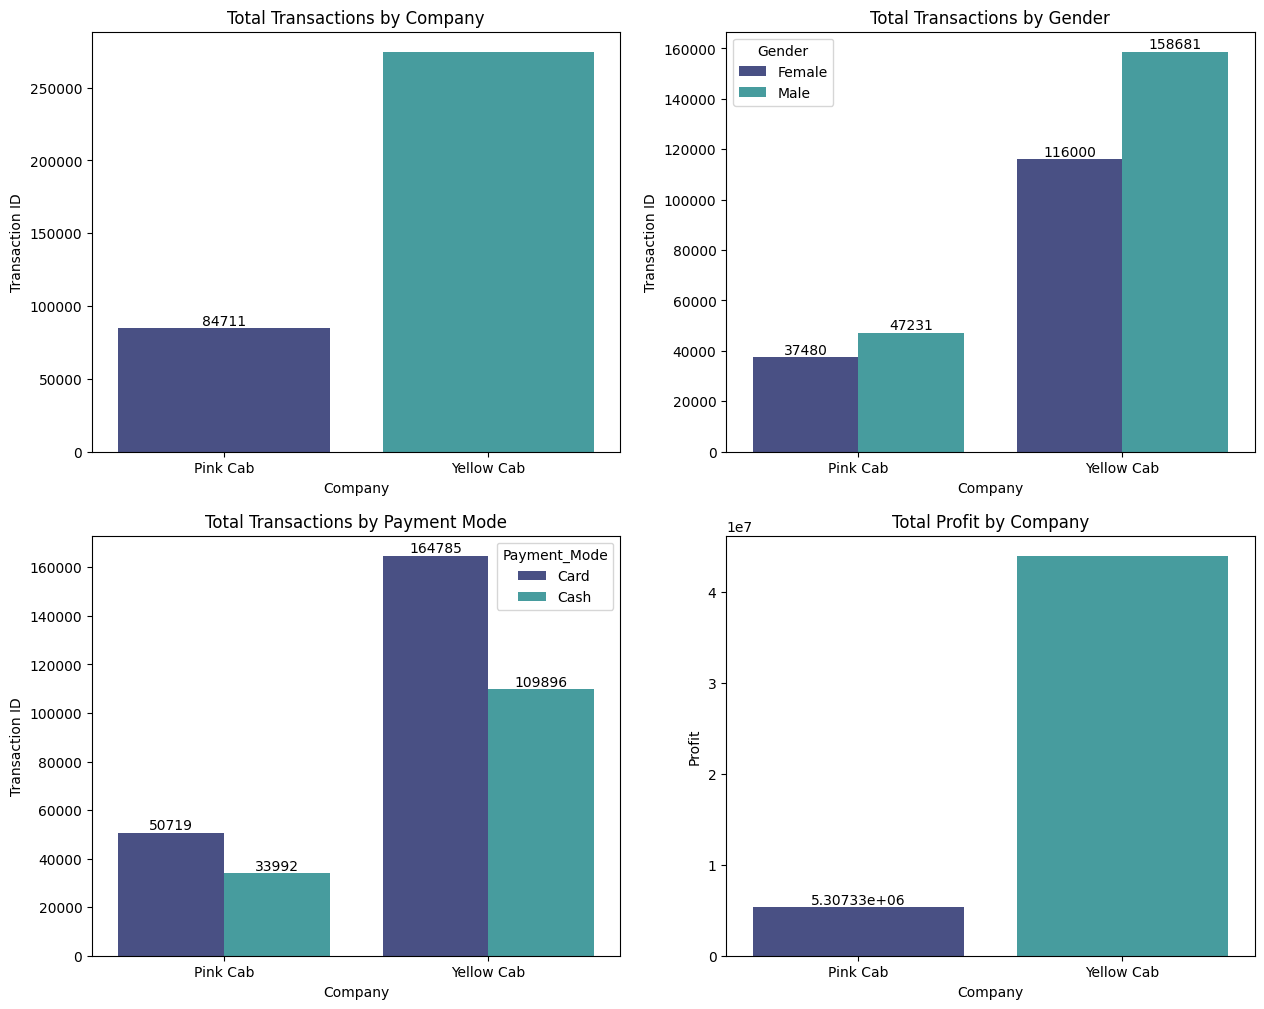

In [45]:
fig = plt.figure(figsize=(15,12))

fig.add_subplot(2,2,1)
group = all_data.groupby('Company')['Transaction ID'].count().reset_index()
ax = sns.barplot(data =group, x= 'Company', y= 'Transaction ID',palette="mako")
plt.title("Total Transactions by Company")
ax.bar_label(ax.containers[0])

fig.add_subplot(2,2,2)
group = all_data.groupby(by=['Company','Gender'])['Transaction ID'].count().reset_index()
ax = sns.barplot(data =group, x="Company", hue="Gender", y='Transaction ID',palette="mako")
plt.title("Total Transactions by Gender")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])


fig.add_subplot(2,2,3)
group = all_data.groupby(by=['Company','Payment_Mode'])['Transaction ID'].count().reset_index()
ax = sns.barplot(data =group, x="Company", hue="Payment_Mode", y='Transaction ID',palette="mako")
plt.title("Total Transactions by Payment Mode")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

fig.add_subplot(2,2,4)
group = all_data.groupby(by=['Company'])['Profit'].sum().reset_index()
ax = sns.barplot(data =group, x="Company", y='Profit',palette="mako")
plt.title("Total Profit by Company")
ax.bar_label(ax.containers[0])

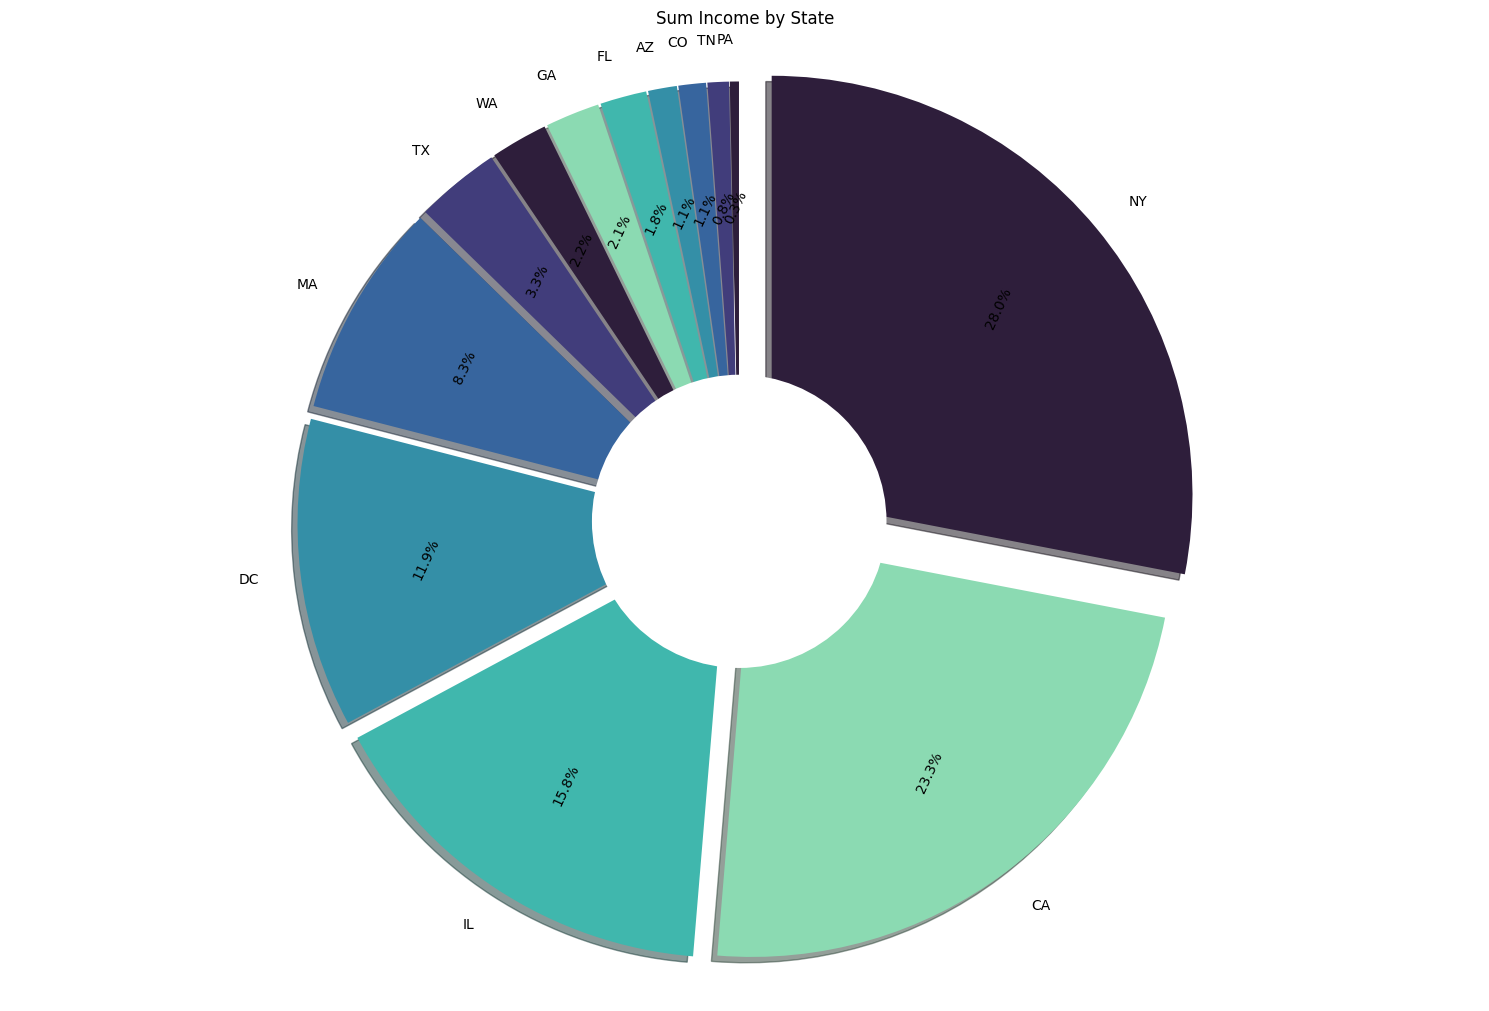

In [86]:
state_income=all_data.groupby("State").agg({"Income (USD/Month)":"sum"}).sort_values('Income (USD/Month)').reset_index()
state_income.columns=['State','Income (USD/Month)']

fig, ax = plt.subplots(figsize=(15,10))

textprops = {"fontsize":10}
explodes = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2]

pie_properties=ax.pie(data=state_income, x='Income (USD/Month)', labels= 'State' , pctdistance=0.7,
               autopct='%1.1f%%',
               colors=sns.color_palette("mako"),radius = 2,
               explode = explodes, shadow=True, startangle=90 , textprops =textprops);

centre_circle=plt.Circle((0,0),0.70,fc='white')

fraction_text_list = pie_properties[2]
for text in fraction_text_list:
    text.set_rotation(65)
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')

plt.tight_layout()
plt.title ("Sum Income by State")

plt.show()

<ipython-input-47-78429c499172>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data =group, x= 'City', y= 'Income (USD/Month)',palette="mako")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'NEW YORK NY'),
  Text(1, 0, 'CHICAGO IL'),
  Text(2, 0, 'LOS ANGELES CA'),
  Text(3, 0, 'WASHINGTON DC'),
  Text(4, 0, 'BOSTON MA'),
  Text(5, 0, 'SAN DIEGO CA'),
  Text(6, 0, 'SILICON VALLEY'),
  Text(7, 0, 'SEATTLE WA'),
  Text(8, 0, 'ATLANTA GA'),
  Text(9, 0, 'DALLAS TX'),
  Text(10, 0, 'MIAMI FL'),
  Text(11, 0, 'AUSTIN TX'),
  Text(12, 0, 'ORANGE COUNTY'),
  Text(13, 0, 'DENVER CO'),
  Text(14, 0, 'NASHVILLE TN'),
  Text(15, 0, 'SACRAMENTO CA'),
  Text(16, 0, 'PHOENIX AZ'),
  Text(17, 0, 'TUCSON AZ'),
  Text(18, 0, 'PITTSBURGH PA')])

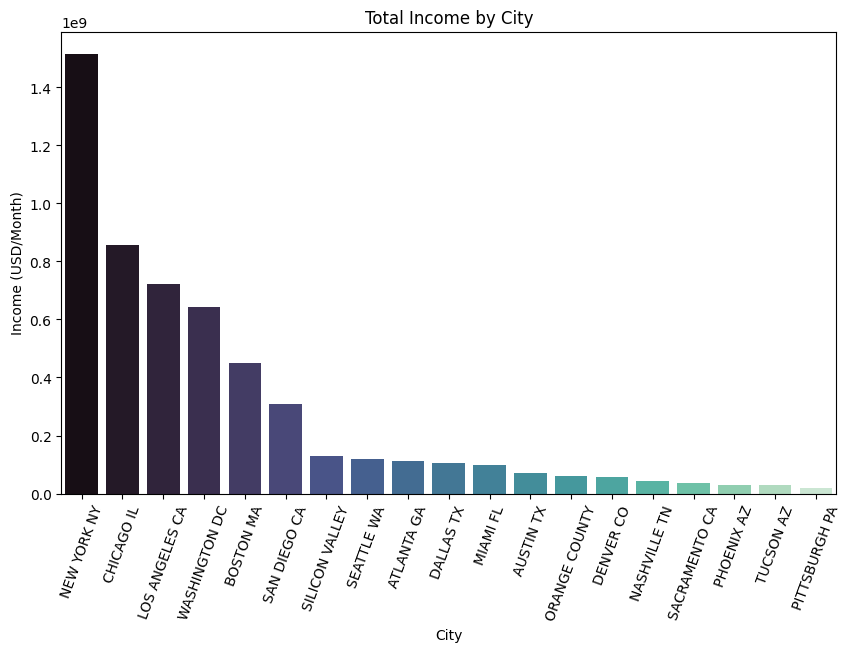

In [47]:
fig = plt.figure(figsize=(10,6))

group = all_data.groupby('City')['Income (USD/Month)'].sum().sort_values(ascending=False).reset_index()
ax = sns.barplot(data =group, x= 'City', y= 'Income (USD/Month)',palette="mako")
plt.title("Total Income by City")
plt.xticks(rotation=70)

<ipython-input-48-90b19ba75da3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=population, x='Population',y='City', palette="mako")


Text(0.5, 1.0, 'Total Population by City')

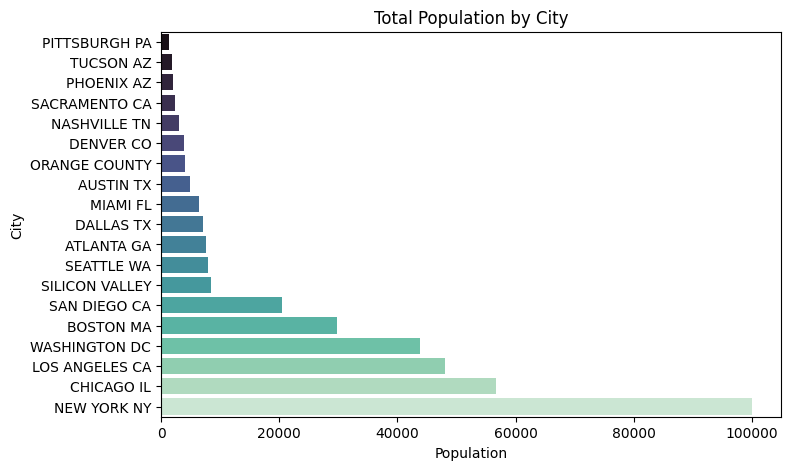

In [48]:
plt.figure(figsize=(8,5))
population=all_data.groupby("City").agg({"Population":"count"}).sort_values('Population').reset_index()
ax=sns.barplot(data=population, x='Population',y='City', palette="mako")
plt.title('Total Population by City')


Text(0.5, 1.0, 'Number of Customers in Cities by Company')

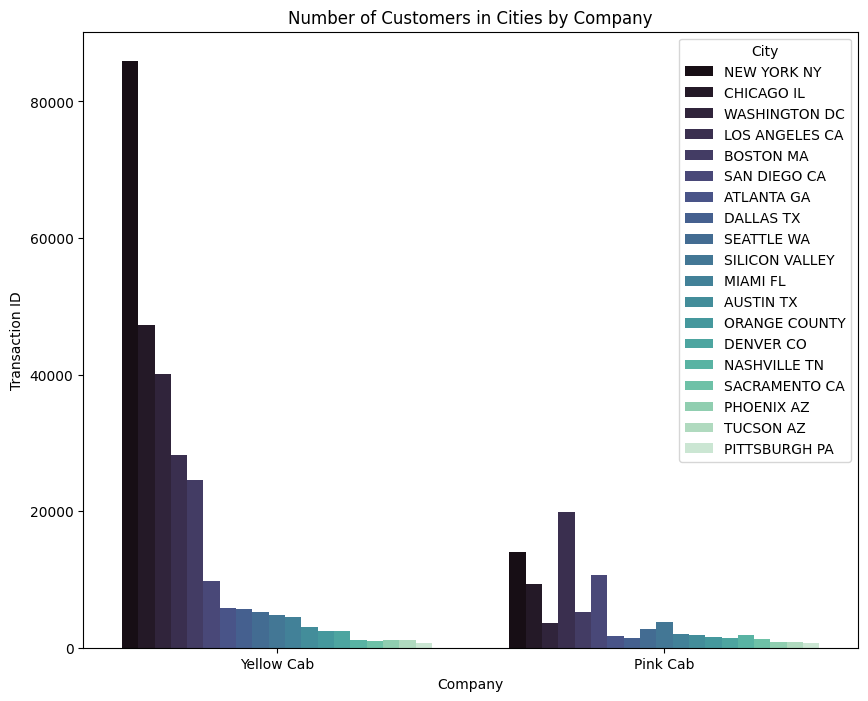

In [49]:
plt.figure(figsize=(10,8))
group = all_data.groupby(['Company','City'])['Transaction ID'].count().sort_values(ascending=False).reset_index()
ax = sns.barplot(data =group, x="Company", hue="City", y='Transaction ID', palette="mako")
plt.title("Number of Customers in Cities by Company")

Text(0.5, 1.0, 'KM Travelled by Company')

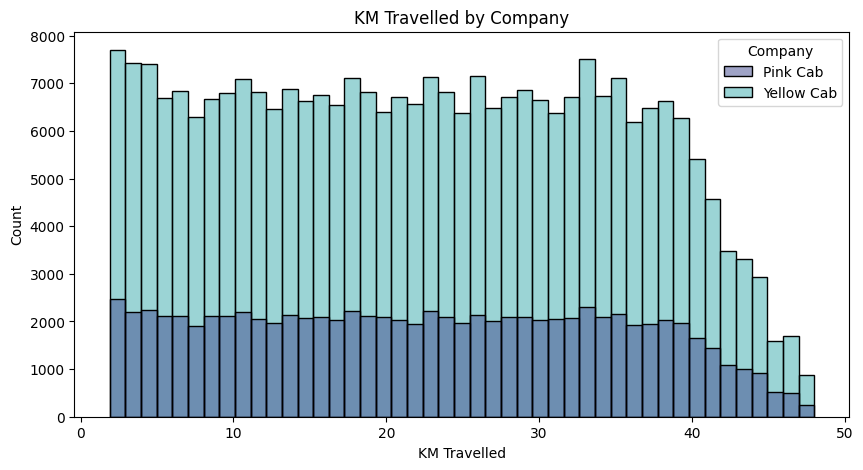

In [50]:
plt.figure(figsize=(10,5))
#group = all_data.groupby(['Company'])['KM Travelled'].count().sort_values(ascending=False).reset_index()
ax = sns.histplot(data =all_data, x="KM Travelled", hue="Company",bins=45,palette="mako")
plt.title("KM Travelled by Company")

In [51]:
x=all_data.groupby(all_data['KM Travelled']==5)['Users'].sum().reset_index()
x

,KM Travelled,Users
0,False,56860859811
1,True,54463531


Text(0.5, 1.0, 'Profit in Cities by Company')

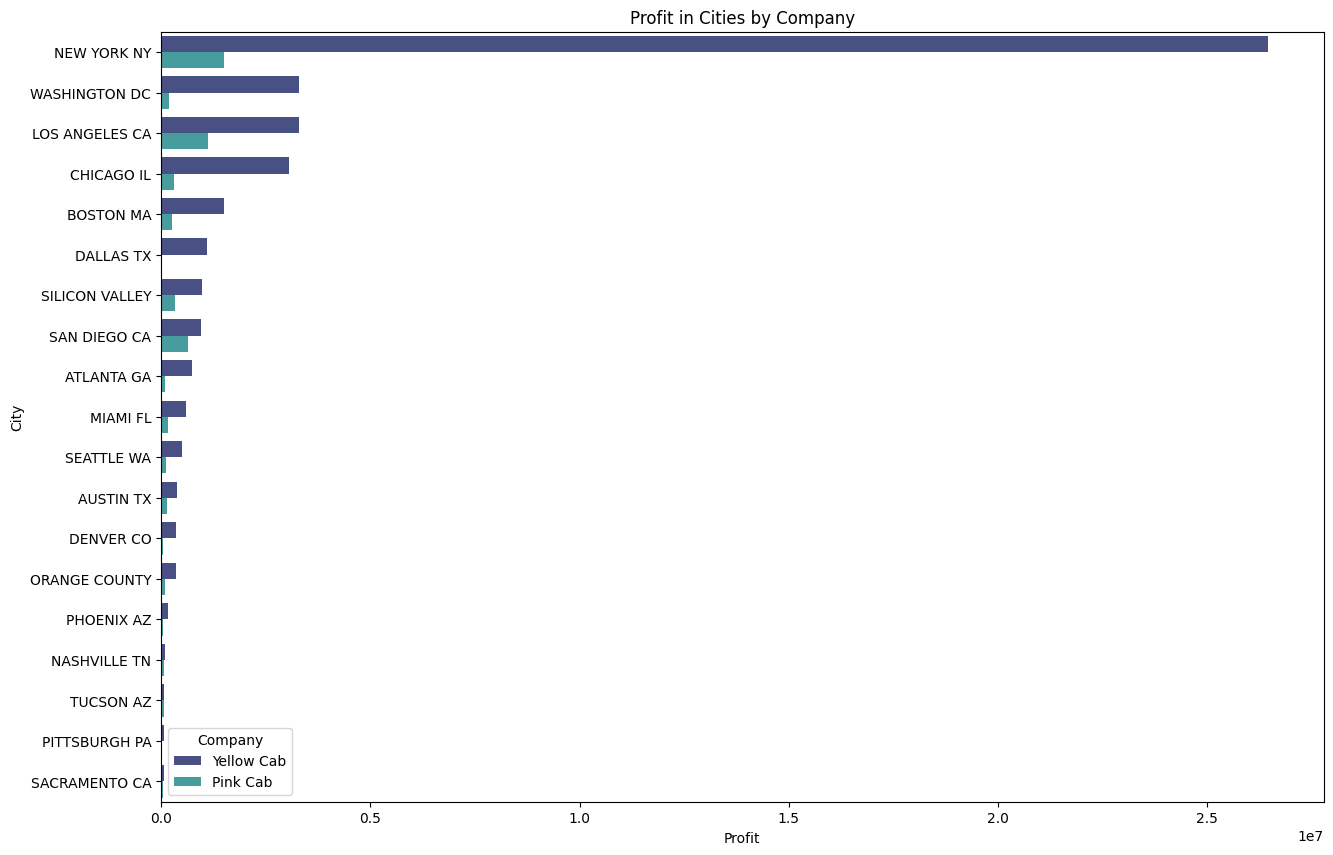

In [52]:
plt.figure(figsize=(15,10))
group = all_data.groupby(['Company','City'])['Profit'].sum().sort_values(ascending=False).reset_index()
ax = sns.barplot(data =group, x='Profit', y="City", hue="Company",palette="mako")
plt.title("Profit in Cities by Company")

In [53]:
agg_dict = {
    'Transaction ID': 'count'
}
data_age = all_data.groupby(['Company', 'Gender']).agg(agg_dict).sort_values(by='Transaction ID').reset_index()
data_age.rename({'Company':'label', 'Gender':'Gender', 'Transaction ID': 'count'}, axis=1, inplace=True)
data_age.head()

,label,Gender,count
0,Pink Cab,Female,37480
1,Pink Cab,Male,47231
2,Yellow Cab,Female,116000
3,Yellow Cab,Male,158681


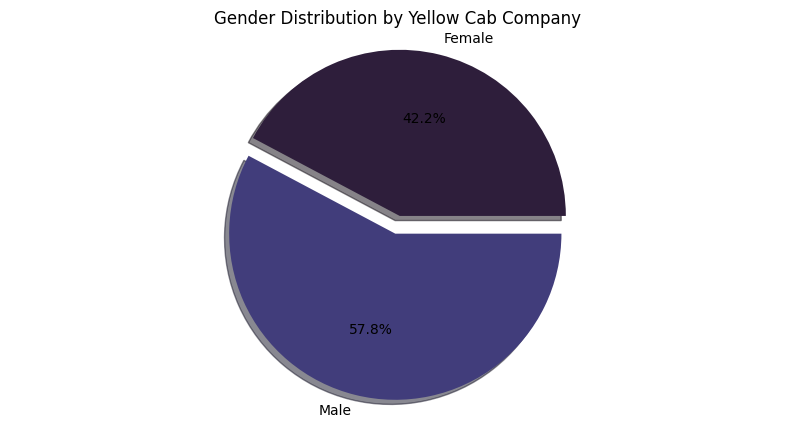

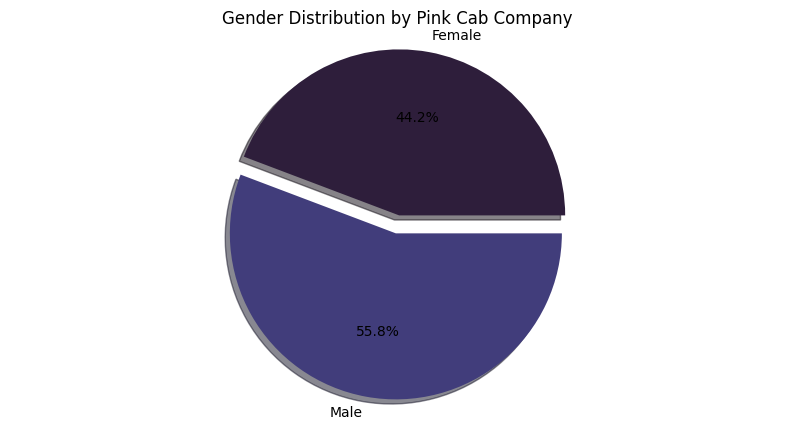

In [55]:
fig, ax= plt.subplots(figsize=(10,5))


textprops = {"fontsize":10}
explodes = [0.1, 0.01]
data=data_age[data_age['label']=='Yellow Cab']
ax.pie(data =data, x='count', labels="Gender", colors=sns.color_palette("mako"),
            explode = explodes, autopct='%1.1f%%', shadow=True,textprops =textprops)
ax.set_title("Gender Distribution by Yellow Cab Company", fontsize=12)
ax.axis('equal')

fig, ax= plt.subplots(figsize=(10,5))
textprops = {"fontsize":10}
explodes = [0.1, 0.01]
data=data_age[data_age['label']=='Pink Cab']
ax.pie(data =data, x='count', labels="Gender", colors=sns.color_palette("mako"),
            explode = explodes, autopct='%1.1f%%', shadow=True,textprops =textprops)
ax.set_title("Gender Distribution by Pink Cab Company", fontsize=12)
ax.axis('equal')

plt.show()

<ipython-input-57-979301df44a4>:8: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-57-979301df44a4>:15: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



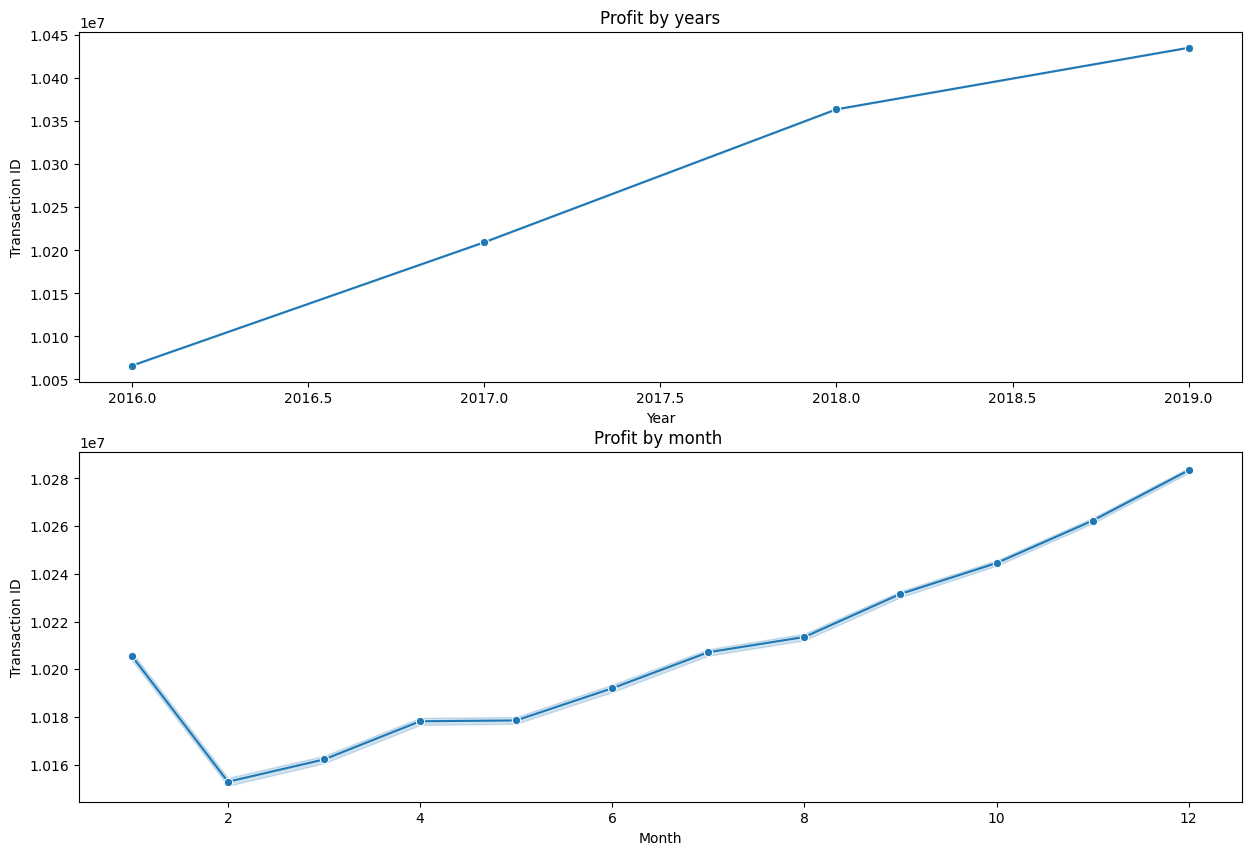

In [57]:
#Examination of the data set in monthly and annual periods
fig=plt.figure(figsize=(15,10))

fig.add_subplot(2,1,1)
all_data["Year"] = all_data["Date of Travel"].apply(lambda x: x.year)
plt.title("Profit by years")
ax=sns.lineplot(data=all_data, x='Year', y='Transaction ID', marker='o',palette="mako")

fig.add_subplot(2,1,2)
all_data["Month"] = all_data["Date of Travel"].apply(lambda x: x.month)
plt.title("Profit by month ")
ax=sns.lineplot(data=all_data, x='Month', y='Transaction ID', marker='o',palette="mako")

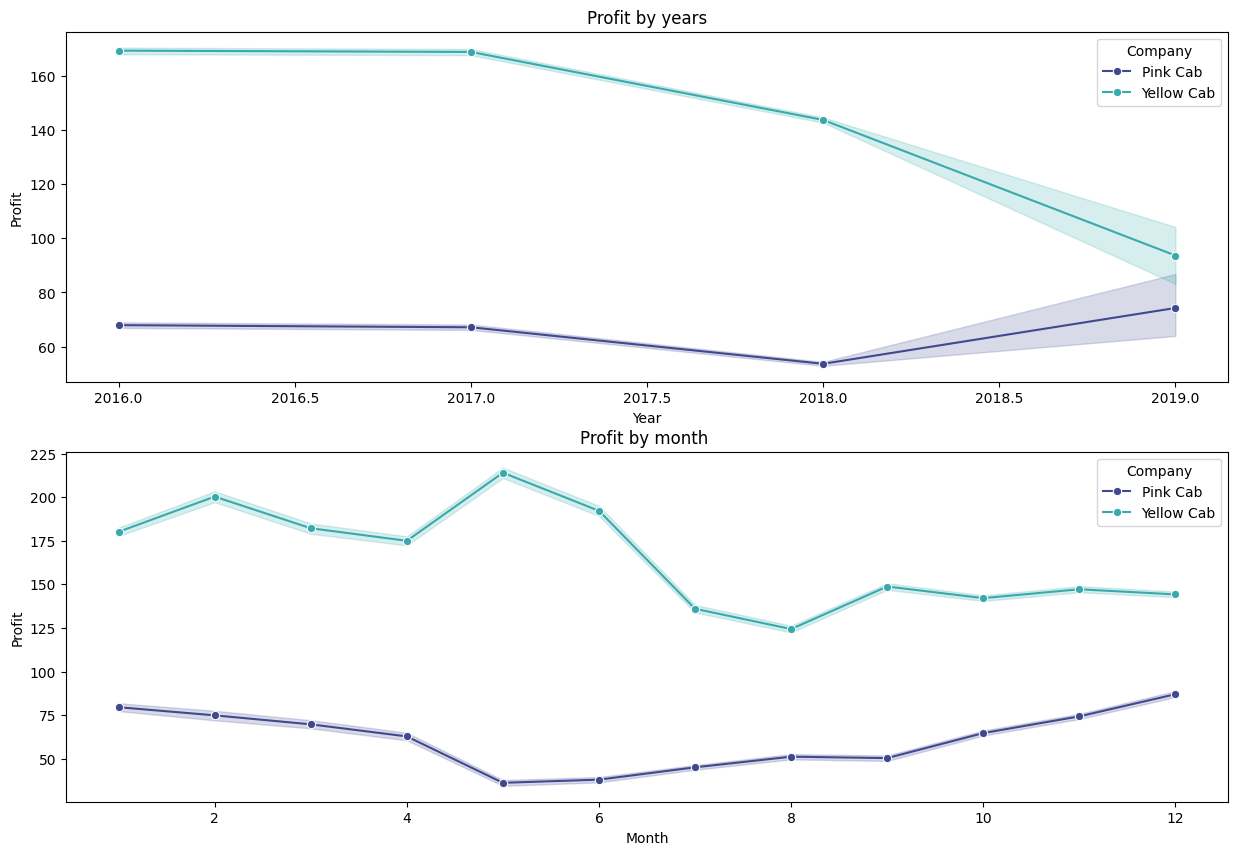

In [58]:
#Examination of the data set in monthly and annual periods
fig=plt.figure(figsize=(15,10))

fig.add_subplot(2,1,1)
all_data["Year"] = all_data["Date of Travel"].apply(lambda x: x.year)
plt.title("Profit by years")
ax=sns.lineplot(data=all_data, x='Year', y='Profit', hue="Company", marker='o',palette="mako")

fig.add_subplot(2,1,2)
all_data["Month"] = all_data["Date of Travel"].apply(lambda x: x.month)
plt.title("Profit by month ")
ax=sns.lineplot(data=all_data, x='Month', y='Profit', hue="Company", marker='o',palette="mako")

Text(0.5, 1.0, 'Age Distribution by Company')

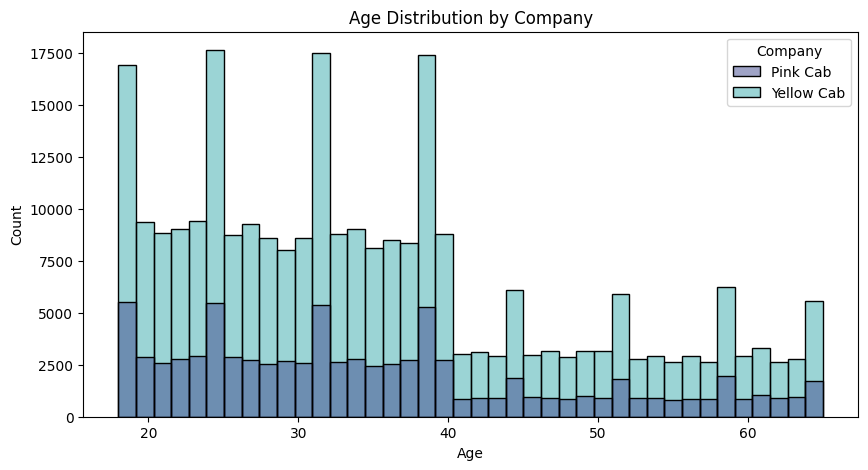

In [61]:
plt.figure(figsize=(10,5))
sns.histplot(data =all_data, x="Age", hue="Company", bins=40, palette="mako")
plt.title("Age Distribution by Company")

In [62]:
all_data['Year']

,Year
0,2016
1,2016
2,2016
3,2016
4,2016
...,...
359387,2018
359388,2018
359389,2018
359390,2018


In [63]:
#"Average Profit Per KM
profit=all_data.groupby(['Company','Year'])['Profit'].sum().reset_index()
km=all_data.groupby(['Company','Year'])['KM Travelled'].sum().reset_index()
data1=profit['Profit']/km['KM Travelled']
data1=pd.DataFrame(data1)
data1.rename(columns={data1.columns[0]:'Profit'},inplace=True)
data1.loc[:, "Year"] = profit['Year']
data1.loc[:, "Company"] = profit['Company']
group=data1.groupby(['Company','Year'])['Profit'].sum().reset_index()
group

,Company,Year,Profit
0,Pink Cab,2016,3.024160
1,Pink Cab,2017,2.965563
2,Pink Cab,2018,2.374093
3,Pink Cab,2019,3.200222
4,Yellow Cab,2016,7.489302
5,Yellow Cab,2017,7.484665
6,Yellow Cab,2018,6.379079
7,Yellow Cab,2019,4.150689


<ipython-input-64-14eb2d603dd2>:15: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




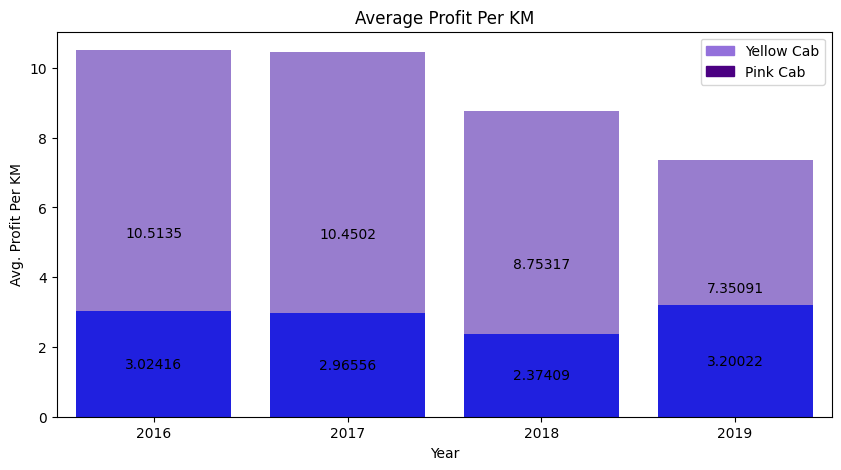

In [64]:
import matplotlib.patches as mpatches

plt.figure(figsize=(10,5))
group=data1.groupby(['Year'])['Profit'].sum().reset_index()

bar1 = sns.barplot(x="Year",  y="Profit", data=group, color='mediumpurple')

# take only company=Pink Cab values from the data
company = data1[data1.Company=='Pink Cab']

#bottom bars (group of 'company=Pink Cab')
bar2 = sns.barplot(x="Year", y="Profit", data=company, estimator=sum, ci=None,  color='Blue')

#add legend
top_bar = mpatches.Patch(color='mediumpurple', label='Yellow Cab')
bottom_bar = mpatches.Patch(color='indigo', label='Pink Cab')
plt.legend(handles=[top_bar, bottom_bar])

#add label
bar1.bar_label(bar1.containers[0],label_type='center')
bar2.bar_label(bar2.containers[1],label_type='center')

plt.ylabel("Avg. Profit Per KM")
plt.title("Average Profit Per KM")

# show the graph
plt.show()

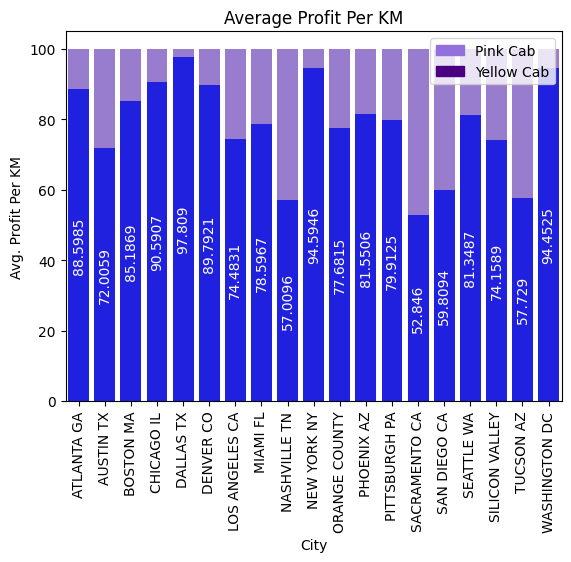

In [66]:
fig, ax = plt.subplots()


total = all_data.groupby('City')['Profit'].sum().reset_index()
company = all_data[all_data.Company=='Yellow Cab'].groupby('City')['Profit'].sum().reset_index()
company['Profit'] = [i / j * 100 for i,j in zip(company['Profit'], total['Profit'])]
total['Profit'] = [i / j * 100 for i,j in zip(total['Profit'], total['Profit'])]

# top bars (group of 'Company')
bar1 = sns.barplot(x="City",  y='Profit', data=total, color='mediumpurple')

#  bottom bars (group of 'Company=Yellow Cab')
bar2 = sns.barplot(x="City", y="Profit", data=company, color='Blue')

# add legend
top_bar = mpatches.Patch(color='mediumpurple', label='Pink Cab')
bottom_bar = mpatches.Patch(color='indigo', label='Yellow Cab')
plt.legend(handles=[top_bar, bottom_bar])

#add label
bar2.bar_label(bar2.containers[1],label_type='center',rotation=90, color='white')


plt.ylabel("Avg. Profit Per KM")
plt.title("Average Profit Per KM")

plt.xticks(rotation=90)
# show the graph
plt.show()

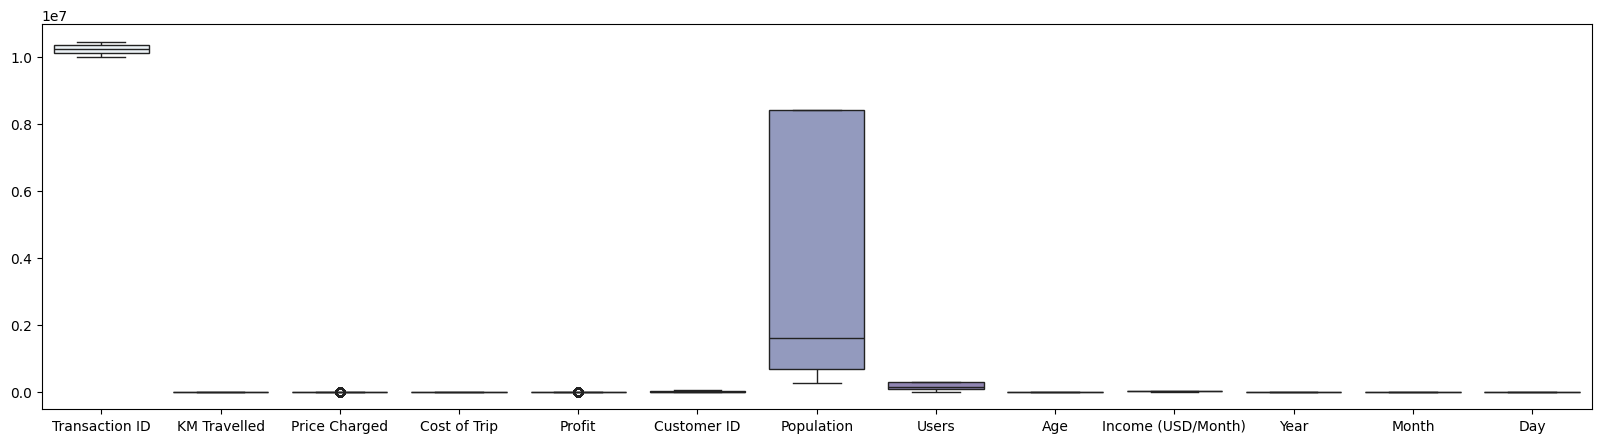

In [69]:
#outliers values
plt.figure(figsize=(20,5))
sns.boxplot(data = all_data, palette='BuPu')
plt.show()

<ipython-input-70-e3560bf5af61>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-70-e3560bf5af61>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




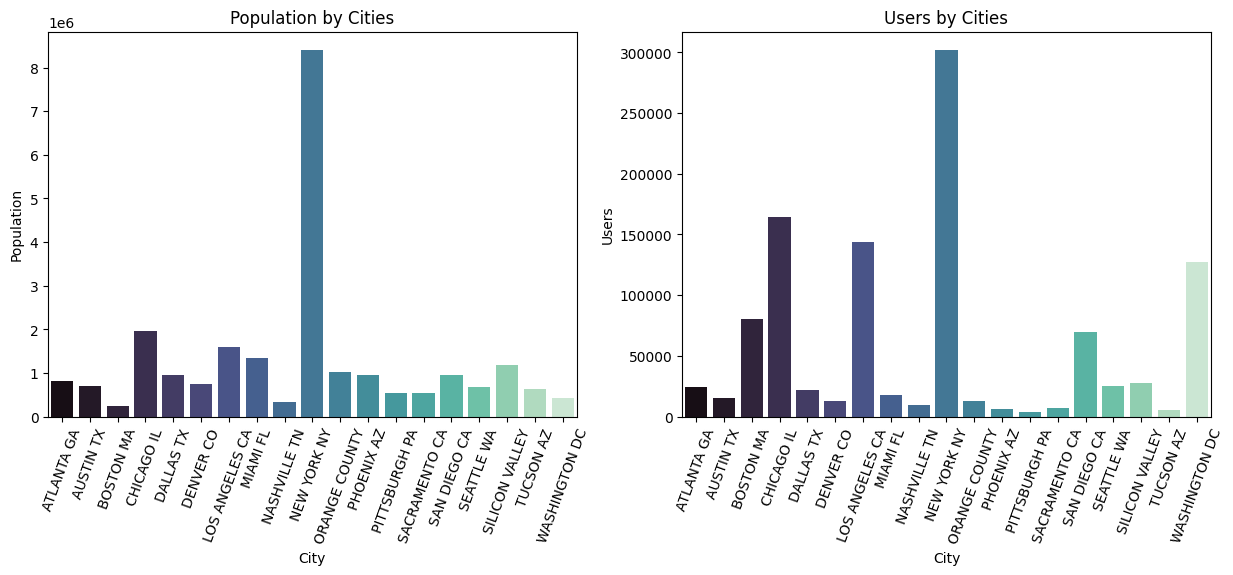

In [70]:
#Population and Users Comparison by Cities
fig=plt.figure(figsize=(15,5))

fig.add_subplot(1,2,1)
sns.barplot(x="City", y="Population", data=all_data, palette="mako")
plt.xticks(rotation=70)
plt.title("Population by Cities")

fig.add_subplot(1,2,2)
sns.barplot(x="City", y="Users", data=all_data, palette="mako")
plt.xticks(rotation=70)
plt.title("Users by Cities")

plt.show()


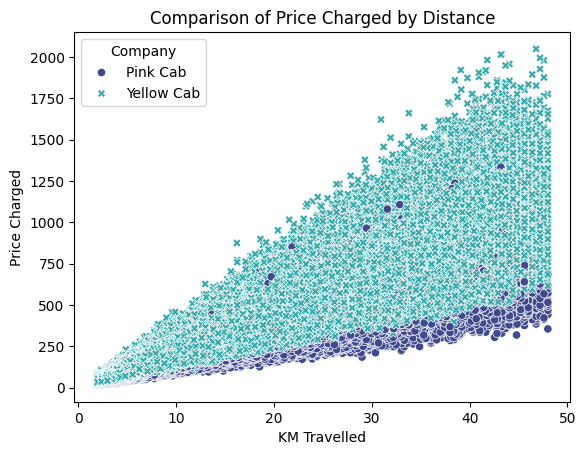

In [71]:
sns.scatterplot(data=all_data, x='KM Travelled', y='Price Charged',
                hue='Company',
                style='Company',
                palette='mako')
plt.title('Comparison of Price Charged by Distance')

plt.show()

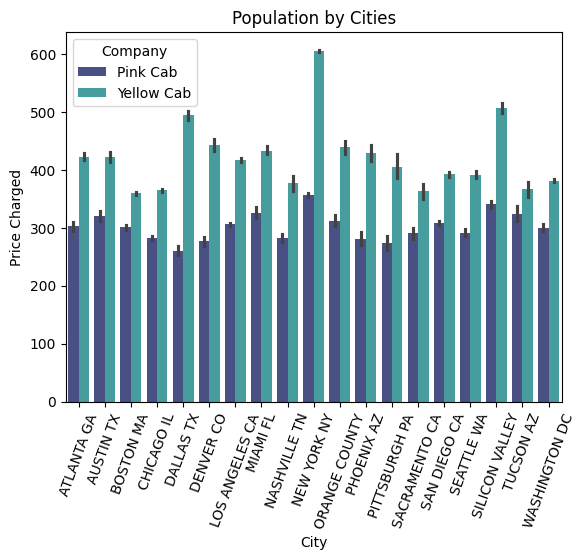

In [72]:
sns.barplot(x="City", y="Price Charged", hue='Company', data=all_data, palette="mako")
plt.xticks(rotation=70)
plt.title("Population by Cities")

plt.show()

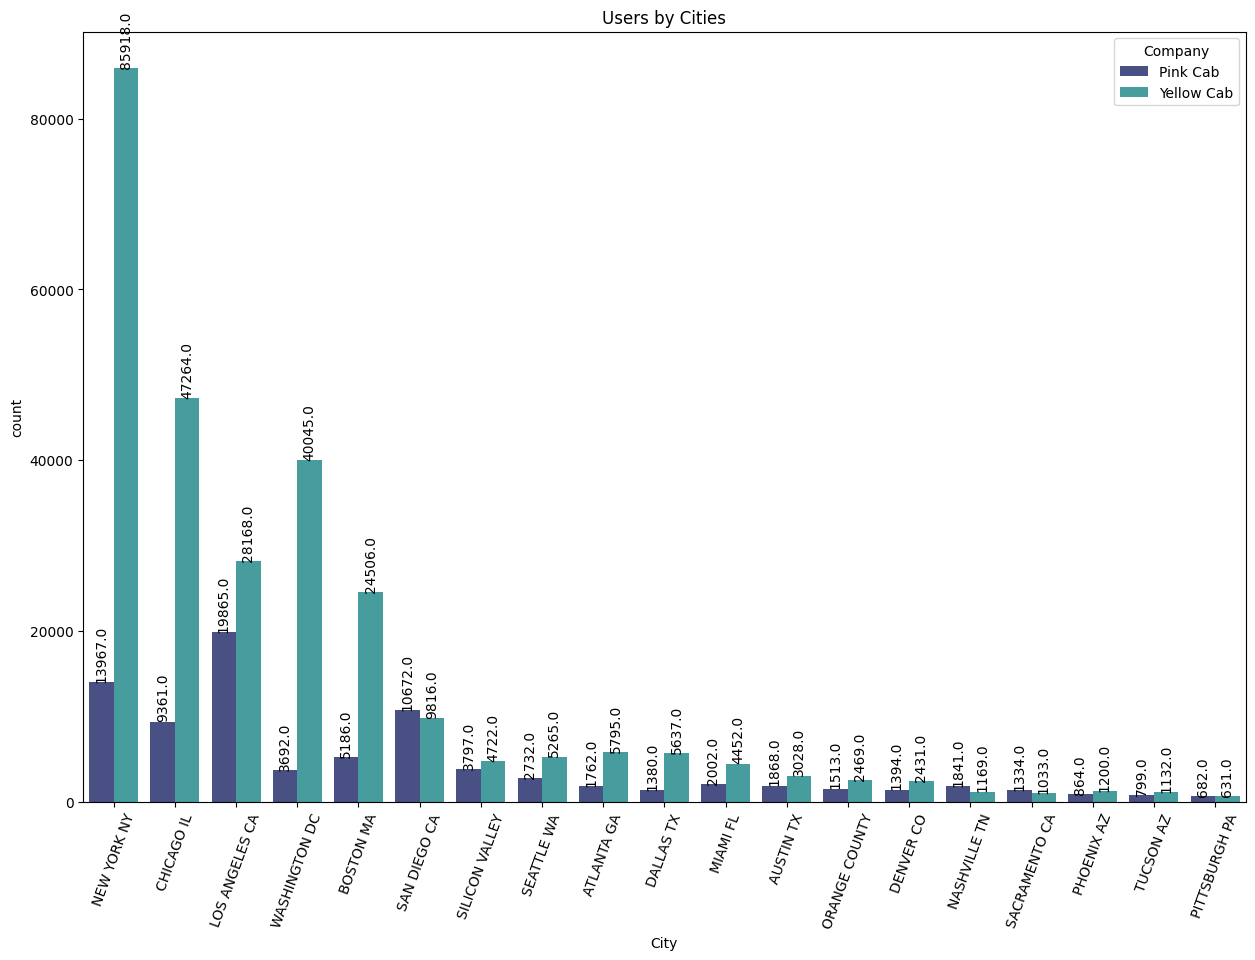

In [75]:
fig=plt.figure(figsize=(15,10))

ax=sns.countplot(x="City", hue='Company', data=all_data,  order = all_data['City'].value_counts().index,palette="mako")
plt.xticks(rotation=70)
plt.title("Users by Cities")

for c in ax.containers:
    labels = [str(round(v.get_height(),10)) for v in c]
    ax.bar_label(c,rotation=90,
                 labels = labels,
                 size = 10)


**label arangment**
https://onezero.blog/introduction-to-stacked-bar-plot-matplotlib-pandas-and-seaborn-visualization-guide-part-2-2/

# **Hypothesis Tests**

In [76]:
#t-test
from scipy.stats import ttest_ind

**Hypothesis 1:**

**H0:**Gender has not effect on company profit
 \
**H1:**Gender has effect on company profit

In [77]:
agg_dict = {
    'Profit': 'mean'
}
group1 = all_data.groupby((all_data.Gender=='Male')&(all_data.Company=='Pink Cab')).agg(agg_dict)
group2 = all_data.groupby((all_data.Gender=='Female')&(all_data.Company=='Pink Cab')).agg(agg_dict)


t_stat,p_value=ttest_ind(group1 , group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")

agg_dict = {
    'Profit': 'mean'
}
group1 = all_data.groupby((all_data.Gender=='Male')&(all_data.Company=='Yellow Cab')).agg(agg_dict)
group2 = all_data.groupby((all_data.Gender=='Female')&(all_data.Company=='Yellow Cab')).agg(agg_dict)



t_stat,p_value=ttest_ind(group1 , group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")


t_statistics: [0.02786795] 
p_value: [0.98029821]
Reject Alternative Hypothesis(H1)
t_statistics: [-0.08386648] 
p_value: [0.94080144]
Reject Alternative Hypothesis(H1)


**Hypothesis 2:**

**H0:**Payment mode has not effect on company profit
 \
**H1:**Payment mode has effect on company profit

In [78]:
agg_dict = {
    'Profit': 'mean'
}
group1 = all_data.groupby((all_data.Payment_Mode=='Cash')&(all_data.Company=='Pink Cab')).agg(agg_dict)
group2 = all_data.groupby((all_data.Payment_Mode=='Card')&(all_data.Company=='Pink Cab')).agg(agg_dict)


t_stat,p_value=ttest_ind(group1 , group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")

agg_dict = {
    'Profit': 'mean'
}
group1 = all_data.groupby((all_data.Payment_Mode=='Cash')&(all_data.Company=='Yellow Cab')).agg(agg_dict)
group2 = all_data.groupby((all_data.Payment_Mode=='Card')&(all_data.Company=='Yellow Cab')).agg(agg_dict)


t_stat,p_value=ttest_ind(group1 , group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")


t_statistics: [-0.03834307] 
p_value: [0.97289731]
Reject Alternative Hypothesis(H1)
t_statistics: [0.17875066] 
p_value: [0.8746019]
Reject Alternative Hypothesis(H1)


**Hypothesis 3:**

**H0:**The variable Year has not a positive correlation with  mileage
 \
**H1:**The variable Year has a positive correlation with  mileage

In [79]:
agg_dict = {
    'KM Travelled': 'mean'
      }
group1 = all_data.groupby((all_data.Year==2018)&(all_data.Company=='Pink Cab')).agg(agg_dict)
group2 = all_data.groupby((all_data.Year==2017)&(all_data.Company=='Pink Cab')).agg(agg_dict)

t_stat,p_value=ttest_ind(group1 , group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")

group1 = all_data.groupby((all_data.Year==2018)&(all_data.Company=='Yellow Cab')).agg(agg_dict)
group2 = all_data.groupby((all_data.Year==2017)&(all_data.Company=='Yellow Cab')).agg(agg_dict)

t_stat,p_value=ttest_ind(group1 , group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")

t_statistics: [-0.66243408] 
p_value: [0.57581736]
Reject Alternative Hypothesis(H1)
t_statistics: [-0.42772975] 
p_value: [0.71050085]
Reject Alternative Hypothesis(H1)


**Hypothesis 4:**

**H0:**Age has not effect on company profit
 \
**H1:**Age has effect on company profit

In [80]:
agg_dict = {
    'Profit': 'mean'
}
group1 = all_data.groupby((all_data.Age <= 50)&(all_data.Company=='Pink Cab')).agg(agg_dict)
group2 = all_data.groupby((all_data.Age > 50)&(all_data.Company=='Pink Cab')).agg(agg_dict)



t_stat,p_value=ttest_ind(group1 , group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")

agg_dict = {
    'Profit': 'mean'
}
group1 = all_data.groupby((all_data.Age <= 50)&(all_data.Company=='Yellow Cab')).agg(agg_dict)
group2 = all_data.groupby((all_data.Age > 50)&(all_data.Company=='Yellow Cab')).agg(agg_dict)



t_stat,p_value=ttest_ind(group1 , group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")


t_statistics: [0.13340069] 
p_value: [0.90608835]
Reject Alternative Hypothesis(H1)
t_statistics: [-0.50355161] 
p_value: [0.66456451]
Reject Alternative Hypothesis(H1)


**Hypothesis 5 :**

**H0:**There is seasonality in the number of customers using the taxi service.
 \
**H1:**There is not seasonality in the number of customers using the taxi service.

In [81]:
!pip install pymannkendall

In [82]:
import pymannkendall as mk
customer_data = all_data.groupby('Month')['Customer ID'].count().reset_index()
print(mk.seasonal_test(customer_data,period=12))

Seasonal_Mann_Kendall_Test(trend='increasing', h=True, p=7.923130374010157e-09, z=5.770085540729481, Tau=0.9090909090909091, s=120.0, var_s=425.3333333333333, slope=1.0, intercept=9196.25)


In [83]:
all_data_set=all_data.to_csv('all_data.csv')